this code is adapted from: https://www.kaggle.com/code/apapiu/regularized-linear-models

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
# from scipy.stats.stats import pearsonr 
from scipy.stats import pearsonr # changed Jake 21-03-2023


%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [12]:
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [13]:
data_path = 'C:/Users/Jake Ormond/Documents/kaggle/house_prices'
train = pd.read_csv(data_path + "/train.csv")
test = pd.read_csv(data_path + "/test.csv")

In [14]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### The price data needs to be log transformed
A plot of the price data shows that it is skewed. Log transfroming the data produces a more normal distribution. Note that the prices variable is only generated here for the purpose of plotting the two distributions side by side.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'log(price)'}>]], dtype=object)

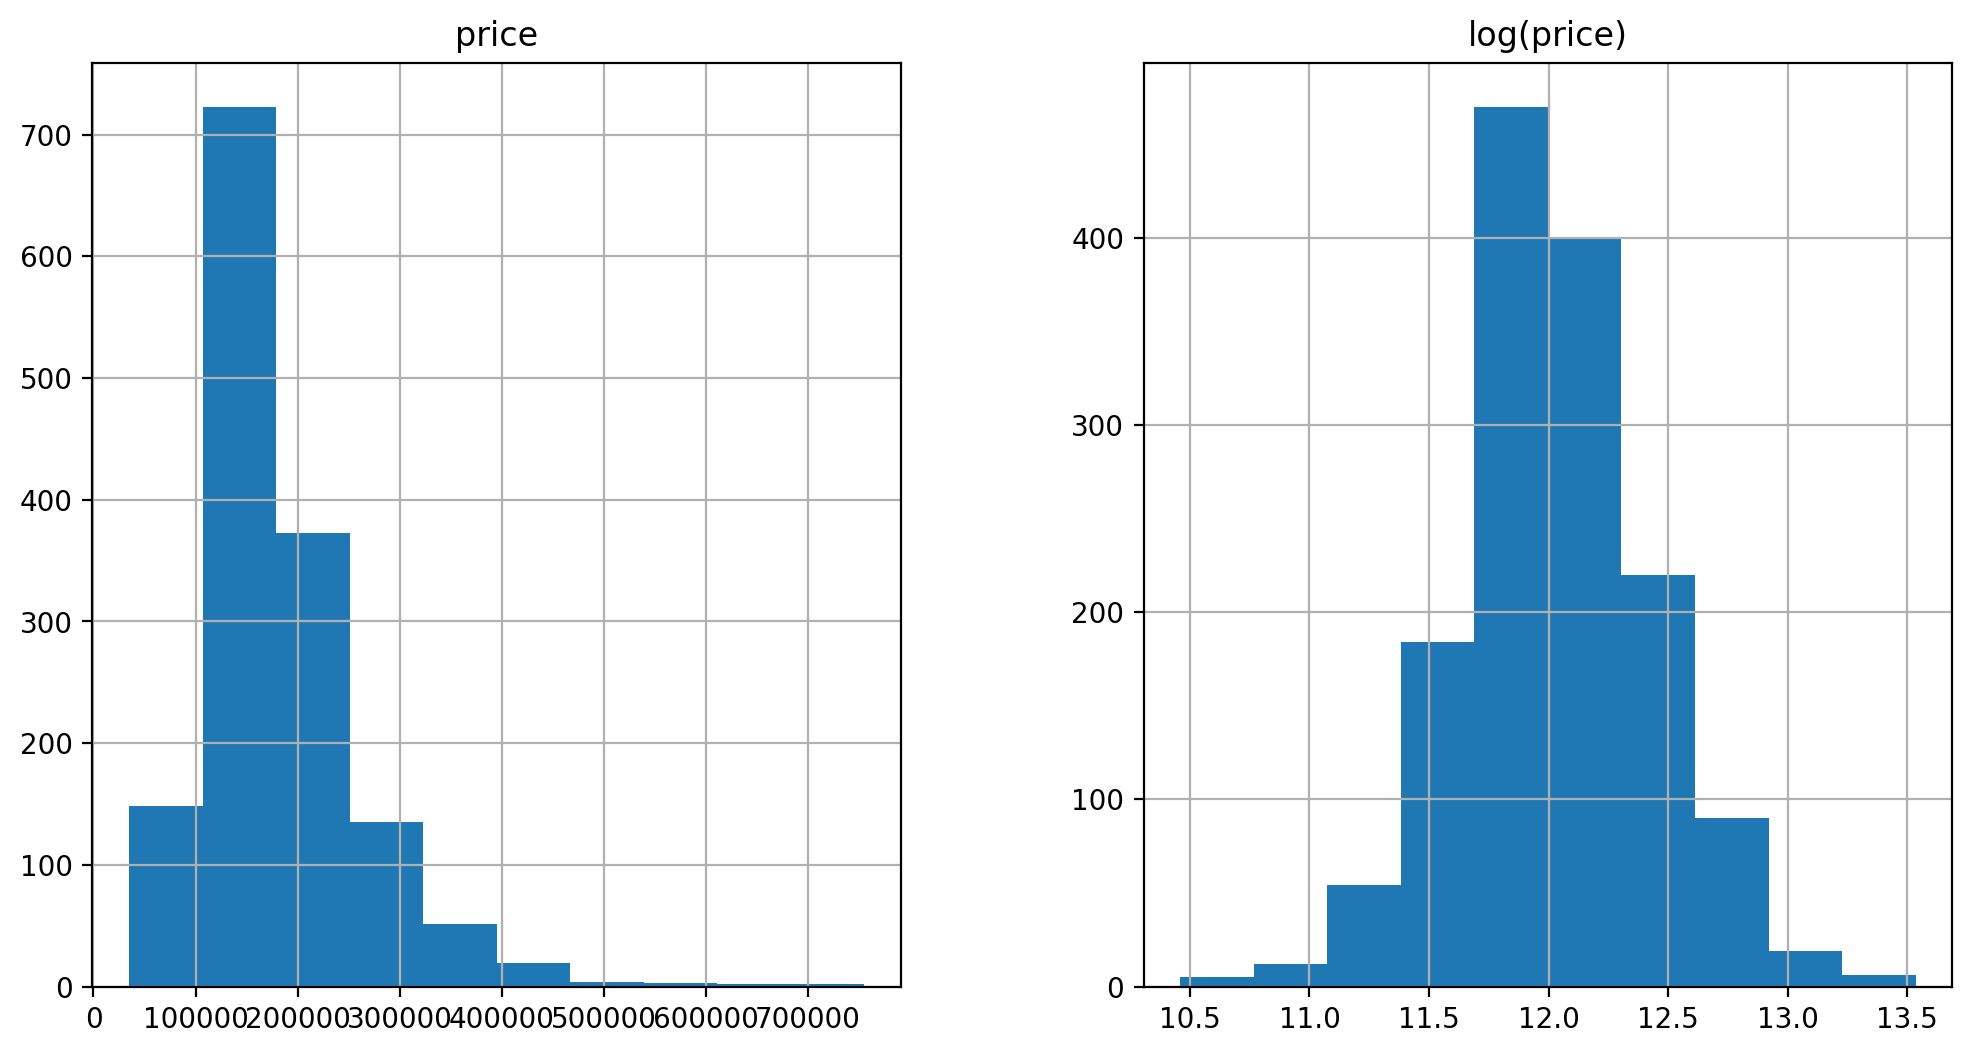

In [18]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price)":np.log(train["SalePrice"])})
prices.hist()
# the original author used log(x+1) (function is np.log1p), but regular log is sufficient here (no values close to 0)

Command df.dtypes outputs the data types of all data frame columns.


In [30]:
#log transform the target:
train["SalePrice"] = np.log(train["SalePrice"]) # this is same data as above



The original author combined training and test data to calculate combined means for the purpose of filling in NaN and/or missing values. This is INCORRECT, as it causes data leakage from test into train. A better approach (though I'm not sure if it is the best, or even a good idea) is to calculate mean just from training, save the value, and apply it to test.

In [47]:
# all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], 
#                    test.loc[:,'MSSubClass':'SaleCondition']))
# pandas.DataFrame.loc: Access a group of rows and columns by label(s) or a boolean array.
all_data = train.loc[:, 'MSSubClass':'SaleCondition']

# get just the numeric features
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# compute skewness
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
print(skewed_feats)
#log transform skewed numeric features:




MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64
